## KMeans aplicado na base de dados 9Gauss

Inicialmente iremos importar os dados da base de dados para utilizarmos em nossa aplicação

In [1]:
import numpy as np 
import pandas as pd 

data9gauss = pd.read_csv('9Gauss.txt', sep="\s+", header=None)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from sklearn.cluster import KMeans

#Inicializar a variavel inertia e bestseed
inertia = 0
bestseed = 0

#Rodar o Kmeans 100x para 100 sementes diferentes
for x in range(0, 100):
    
    #Utilizar 9 Clusters
    kmeans = KMeans(n_clusters=9, random_state=x).fit(data9gauss)
    
    #Caso esteja o valor default, pegar o primeiro valor de inertia
    if (inertia == 0):
        inertia = kmeans.inertia_
        
    else:
    
        #Se o valor de inertia atual for menor que o da variavel, salvar o atual e salvar a semente utilizada
        if (kmeans.inertia_ < inertia):
            inertia = kmeans.inertia_
            bestseed = x

Para garantir a reprodutibilidade do código foi utilizado um range conhecido de sementes.
A seguir foi está exibido o resultado da clusterização do conjunto para a melhor semente encontrada.

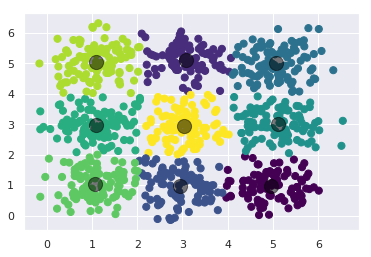

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

kmeans = KMeans(n_clusters=9, random_state=bestseed).fit(data9gauss)

y_kmeans = kmeans.predict(data9gauss)

plt.scatter(data9gauss[0], data9gauss[1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);